<h2>Model</h2>

For this homework we will use Convolutional Neural Network (CNN. Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

    The shape for input should be (150, 150, 3)
    Next, create a covolutional layer (Conv2D):
        Use 32 filters
        Kernel size should be (3, 3) (that's the size of the filter)
        Use 'relu' as activation
    Reduce the size of the feature map with max pooling (MaxPooling2D)
        Set the pooling size to (2, 2)
    Turn the multi-dimensional result into vectors using a Flatten layer
    Next, add a Dense layer with 64 neurons and 'relu' activation
    Finally, create the Dense layer with 1 neuron - this will be the output

As optimizer use SGD with the following parameters:

    SGD(lr=0.002, momentum=0.8)

TODO: add clarification for kernel size and max pooling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

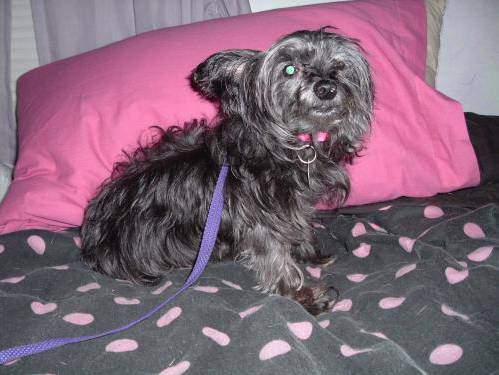

In [3]:
path = './train/dogs'
name = 'dog.0.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [4]:
img = load_img(fullname, target_size=(150, 150))

x = np.array(img)
x.shape

(150, 150, 3)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

In [6]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [7]:
train_ds = train_gen.flow_from_directory('./train',target_size=(150, 150),batch_size=20)

Found 20000 images belonging to 2 classes.


In [8]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [9]:
from tensorflow.keras.applications.xception import Xception

In [31]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

In [10]:
inputs = keras.layers.Input(shape=(150, 150, 3))
x = keras.layers.Conv2D(32, 3, activation='relu')(inputs)
x = keras.layers.MaxPooling2D(2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation='relu')(x)

output = keras.layers.Dense(2, activation='sigmoid')(x)


model = keras.Model(inputs, output)

optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)

loss = keras.losses.BinaryCrossentropy()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy']
)

model.summary()


2021-11-17 13:03:20.688862: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-17 13:03:20.689345: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-17 13:03:20.735218: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 11,215,938
Trainable params: 11,215,938
Non-trainable params: 0
_________________________________________________

<h2>Question 1</h2>

Since we have a binary classification problem, what is the best loss function for us?

From Keras documentation: https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class
Use BinaryCrossentropy

<h2>Question 2</h2>

What's the total number of parameters of the model? You can use the summary method for that.

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 11,215,938
Trainable params: 11,215,938
Non-trainable params: 0
_________________________________________________

In [34]:
train_gen =ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory('./train',target_size=(150, 150), batch_size=20, shuffle=False)

Found 20000 images belonging to 2 classes.


In [35]:
val_gen = ImageDataGenerator(rescale=1./255)
val_ds = val_gen.flow_from_directory('./validation',target_size=(150, 150), batch_size=20, shuffle=False)

Found 5000 images belonging to 2 classes.


In [14]:
def make_model():
    #base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    #base_model.trainable = False
    
    inputs = keras.layers.Input(shape=(150, 150, 3))
    x = keras.layers.Conv2D(32, 3, activation='relu')(inputs)
    x = keras.layers.MaxPooling2D(2)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(64, activation='relu')(x)

    output = keras.layers.Dense(2, activation='sigmoid')(x)


    model = keras.Model(inputs, output)

    optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)

    loss = keras.losses.BinaryCrossentropy()

    model.compile(optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [15]:
scores={}

model = make_model()
history = model.fit(train_ds,
          steps_per_epoch=100,
          epochs=10,
          validation_data=val_ds,
          validation_steps=50
)

scores = history.history

2021-11-17 13:03:56.411046: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-17 13:03:56.431770: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3065955000 Hz


Epoch 1/10
100/100 [==============================] - 57s 552ms/step - loss: 0.7875 - accuracy: 0.5550 - val_loss: 0.6501 - val_accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 57s 568ms/step - loss: 0.6950 - accuracy: 0.4632 - val_loss: 0.6785 - val_accuracy: 0.9960
Epoch 3/10
100/100 [==============================] - 57s 574ms/step - loss: 0.6948 - accuracy: 0.3904 - val_loss: 0.6824 - val_accuracy: 0.9770
Epoch 4/10
100/100 [==============================] - 57s 571ms/step - loss: 0.6939 - accuracy: 0.4863 - val_loss: 0.6892 - val_accuracy: 0.4030
Epoch 5/10
100/100 [==============================] - 62s 620ms/step - loss: 0.6909 - accuracy: 0.5618 - val_loss: 0.7305 - val_accuracy: 0.0860
Epoch 6/10
100/100 [==============================] - 65s 651ms/step - loss: 0.6883 - accuracy: 0.5492 - val_loss: 0.6858 - val_accuracy: 0.5260
Epoch 7/10
100/100 [==============================] - 65s 650ms/step - loss: 0.6873 - accuracy: 0.5443 - val_loss: 0.7462 - val_ac

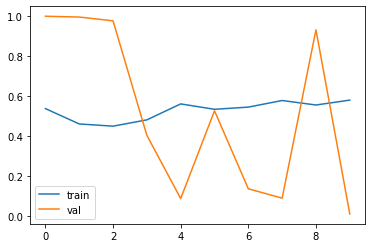

In [16]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

<h2>Question 3</h2>

What is the median of training accuracy for this model?

In [17]:
from statistics import mean, median, mode, stdev

In [18]:
train_accuracy = history.history['accuracy']
median(train_accuracy)

0.5407499969005585

<h2>Question 4</h2>

What is the standard deviation of training loss for this model?

In [19]:
train_loss = history.history['loss']
stdev(train_loss)

0.013868578108019641

Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'


In [36]:
train_gen =ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'                           
)

train_ds = train_gen.flow_from_directory('./train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=False
)

Found 20000 images belonging to 2 classes.


In [33]:
#val_gen = ImageDataGenerator(rescale=1./255,
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest'                          
#)

#val_ds = val_gen.flow_from_directory('./validation',
#    target_size=(150, 150),
#    batch_size=20,
#    shuffle=False
#)

Found 5000 images belonging to 2 classes.


In [37]:
history_aug = model.fit(train_ds,
          steps_per_epoch=100,
          epochs=10,
          validation_data=val_ds,
          validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 54s 543ms/step - loss: 0.6881 - accuracy: 0.5355 - val_loss: 0.6467 - val_accuracy: 0.5830
Epoch 2/10
100/100 [==============================] - 68s 683ms/step - loss: 0.6881 - accuracy: 0.5520 - val_loss: 0.6378 - val_accuracy: 0.6340
Epoch 3/10
100/100 [==============================] - 72s 718ms/step - loss: 0.6845 - accuracy: 0.5535 - val_loss: 0.7091 - val_accuracy: 0.4110
Epoch 4/10
100/100 [==============================] - 67s 667ms/step - loss: 0.6847 - accuracy: 0.5390 - val_loss: 0.6830 - val_accuracy: 0.4680
Epoch 5/10
100/100 [==============================] - 64s 635ms/step - loss: 0.6820 - accuracy: 0.5595 - val_loss: 0.6726 - val_accuracy: 0.5450
Epoch 6/10
100/100 [==============================] - 62s 621ms/step - loss: 0.6762 - accuracy: 0.5860 - val_loss: 0.6297 - val_accuracy: 0.6260
Epoch 7/10
100/100 [==============================] - 64s 642ms/step - loss: 0.6887 - accuracy: 0.5635 - val_loss: 0.6336 - val_ac

<h2>Question 5: Mean for validation loss</h2>

In [38]:
val_loss_aug = history_aug.history['val_loss']
mean(val_loss_aug)

0.6722568094730377

<h2>Question 6: Avg validation accuracy for epochs 5-10</h2>

In [39]:
val_acc_aug = history_aug.history['val_accuracy'][5:]
mean(val_acc_aug)

0.4806000038981438